# 1.任务介绍

预测周杰伦歌词是一个经典的自然语言处理（NLP）任务，旨在通过构建语言模型来生成类似周杰伦歌曲的歌词，为音乐创作提供帮助。对于学习RNN来说，预测周杰伦歌词的任务是一个非常好的实践应用，因为这个任务涉及到了RNN模型，同时还需要涉及到模型的应用、调参以及歌词生成质量的评估等方面的问题。通过更好的理解这些技术和问题，学习者可以加强对RNN的理解、掌握更加实用的技能，提高实际应用的能力。

1. 掌握语言模型的构建和使用。

2. 学习对文本数据进行清洗、分词、词向量化等基础的自然语言处理技能。

3. 通过深入探究中文语言的本质，有助于加深对语言相关知识的理解和应用。

4. 提高文本生成和自然语言理解能力。

5. 为实际应用提供帮助，可以用于歌曲生成、聊天机器人等场景。

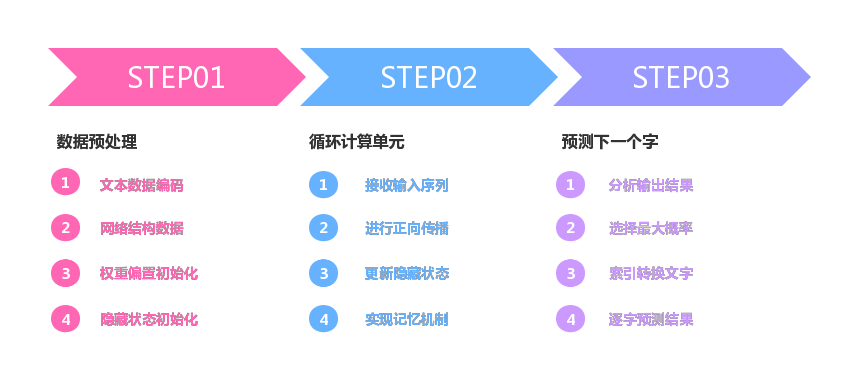

# 2.数据预处理

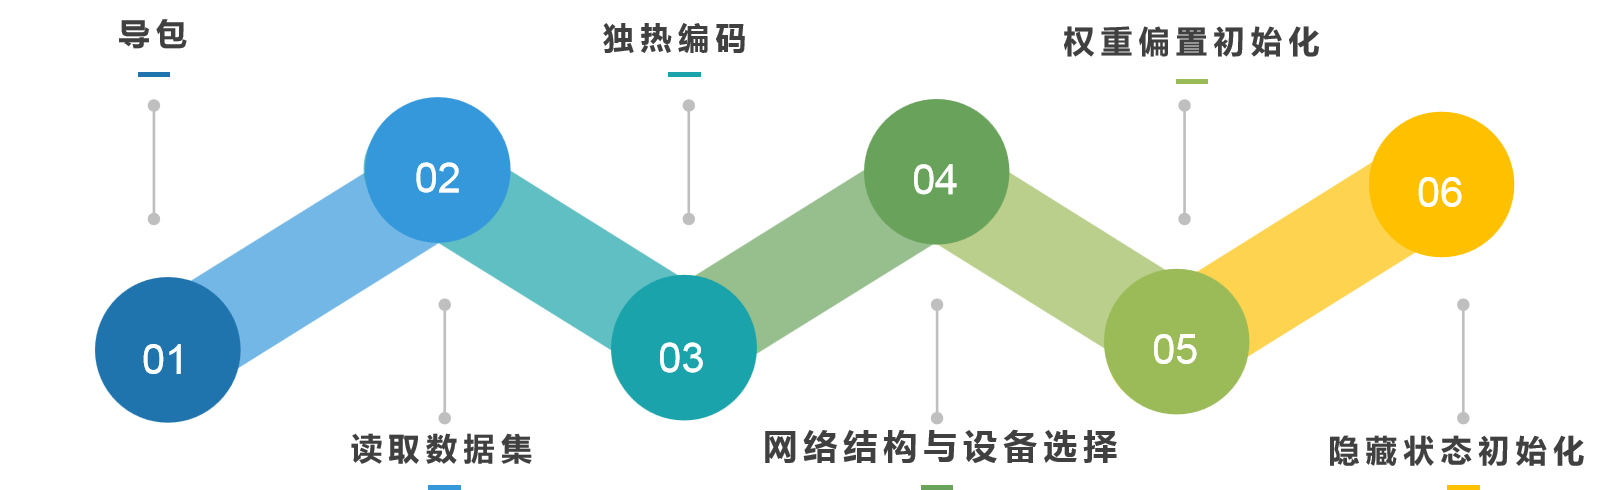

## 2.1导包

In [1]:
import time
import math
import numpy as np
import torch
from torch import nn
import random

## 2.2读取数据集

In [2]:
with open('jaychou_lyrics.txt',encoding='utf-8') as f:
    corpus_chars = f.read()

In [3]:
corpus_chars

'想要有直升机\n想要和你飞到宇宙去\n想要和你融化在一起\n融化在宇宙里\n我每天每天每天在想想想想著你\n这样的甜蜜\n让我开始乡相信命运\n感谢地心引力\n让我碰到你\n漂亮的让我面红的可爱女人\n温柔的让我心疼的可爱女人\n透明的让我感动的可爱女人\n坏坏的让我疯狂的可爱女人\n坏坏的让我疯狂的可爱女人\n漂亮的让我面红的可爱女人\n温柔的让我心疼的可爱女人\n透明的让我感动的可爱女人\n坏坏的让我疯狂的可爱女人\n坏坏的让我疯狂的可爱女人\n想要有直升机\n想要和你飞到宇宙去\n想要和你融化在一起\n融化在宇宙里\n我每天每天每天在想想想想著你\n这样的甜蜜\n让我开始乡相信命运\n感谢地心引力\n让我碰到你\n漂亮的让我面红的可爱女人\n温柔的让我心疼的可爱女人\n透明的让我感动的可爱女人\n坏坏的让我疯狂的可爱女人\n坏坏的让我疯狂的可爱女人\n漂亮的让我面红的可爱女人\n温柔的让我心疼的可爱女人\n透明的让我感动的可爱女人\n坏坏的让我疯狂的可爱女人\n坏坏的让我疯狂的可爱女人\n漂亮的让我面红的可爱女人\n温柔的让我心疼的可爱女人\n透明的让我感动的可爱女人\n坏坏的让我疯狂的可爱女人\n坏坏的让我疯狂的可爱女人\n漂亮的让我面红的可爱女人\n温柔的让我心疼的可爱女人\n透明的让我感动的可爱女人\n坏坏的让我疯狂的可爱女人\n坏坏的让我疯狂的可爱女人\n如果说怀疑 可以造句如果说分离 能够翻译\n如果这一切 真的可以\n我想要将我的寂寞封闭\n然后在这里 不限日期\n然后将过去 慢慢温习\n让我爱上你 那场悲剧\n是你完美演出的一场戏\n宁愿心碎哭泣 再狠狠忘记 你爱过我的证据\n让晶莹的泪滴 闪烁成回忆 伤人的美丽\n你的完美主义 太彻底\n让我连恨都难以下笔\n将真心抽离写成日记 像是一场默剧\n你的完美主义 太彻底\n分手的话像语言暴力\n我已无能为力再提起 决定中断熟悉\n然后在这里 不限日期\n然后将过去 慢慢温习\n让我爱上你 那场悲剧\n是你完美演出的一场戏\n宁愿心碎哭泣 再狠狠忘记 你爱过我的证据\n让晶莹的泪滴 闪烁成回忆 伤人的美丽\n你的完美主义 太彻底\n让我连恨都难以下笔\n将真心抽离写成日记 像是一场默剧\n你的完美主义 太彻底\n分手的话像语言暴力\n我已无能为力再提起 决定中断熟悉\n周杰伦 周杰伦\n一步两步三步

In [4]:
corpus_chars = corpus_chars.replace('\n',' ')
corpus_chars = corpus_chars[0:10000]
corpus_chars

'想要有直升机 想要和你飞到宇宙去 想要和你融化在一起 融化在宇宙里 我每天每天每天在想想想想著你 这样的甜蜜 让我开始乡相信命运 感谢地心引力 让我碰到你 漂亮的让我面红的可爱女人 温柔的让我心疼的可爱女人 透明的让我感动的可爱女人 坏坏的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 漂亮的让我面红的可爱女人 温柔的让我心疼的可爱女人 透明的让我感动的可爱女人 坏坏的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 想要有直升机 想要和你飞到宇宙去 想要和你融化在一起 融化在宇宙里 我每天每天每天在想想想想著你 这样的甜蜜 让我开始乡相信命运 感谢地心引力 让我碰到你 漂亮的让我面红的可爱女人 温柔的让我心疼的可爱女人 透明的让我感动的可爱女人 坏坏的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 漂亮的让我面红的可爱女人 温柔的让我心疼的可爱女人 透明的让我感动的可爱女人 坏坏的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 漂亮的让我面红的可爱女人 温柔的让我心疼的可爱女人 透明的让我感动的可爱女人 坏坏的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 漂亮的让我面红的可爱女人 温柔的让我心疼的可爱女人 透明的让我感动的可爱女人 坏坏的让我疯狂的可爱女人 坏坏的让我疯狂的可爱女人 如果说怀疑 可以造句如果说分离 能够翻译 如果这一切 真的可以 我想要将我的寂寞封闭 然后在这里 不限日期 然后将过去 慢慢温习 让我爱上你 那场悲剧 是你完美演出的一场戏 宁愿心碎哭泣 再狠狠忘记 你爱过我的证据 让晶莹的泪滴 闪烁成回忆 伤人的美丽 你的完美主义 太彻底 让我连恨都难以下笔 将真心抽离写成日记 像是一场默剧 你的完美主义 太彻底 分手的话像语言暴力 我已无能为力再提起 决定中断熟悉 然后在这里 不限日期 然后将过去 慢慢温习 让我爱上你 那场悲剧 是你完美演出的一场戏 宁愿心碎哭泣 再狠狠忘记 你爱过我的证据 让晶莹的泪滴 闪烁成回忆 伤人的美丽 你的完美主义 太彻底 让我连恨都难以下笔 将真心抽离写成日记 像是一场默剧 你的完美主义 太彻底 分手的话像语言暴力 我已无能为力再提起 决定中断熟悉 周杰伦 周杰伦 一步两步三步四步望著天 看星星 一颗两颗三颗四颗 连成线一步两步三步四步望著天 看星星 一颗两颗三颗四颗 连成线乘著风 游荡在蓝天边 一片云掉落在我面前 捏成你的形

## 2.3文字索引

In [7]:
idx_to_char = list(set(corpus_chars))

In [5]:
set(corpus_chars)

{'反',
 '啸',
 '站',
 '除',
 '驳',
 '其',
 '吴',
 '猪',
 '离',
 '乘',
 '索',
 '碑',
 '单',
 '马',
 '弃',
 '已',
 '玩',
 '纪',
 '弄',
 ' ',
 '夜',
 '定',
 '粥',
 '恼',
 '半',
 '街',
 '为',
 '语',
 '咒',
 '酿',
 '夫',
 '颗',
 '口',
 '屉',
 '肉',
 '宠',
 '角',
 '该',
 '丘',
 '纯',
 '宙',
 '能',
 '据',
 '造',
 '落',
 '霜',
 '上',
 '断',
 '三',
 'A',
 '衫',
 '起',
 '经',
 '花',
 '次',
 '丽',
 '杂',
 '牛',
 '行',
 '王',
 '配',
 '盘',
 '淡',
 '伦',
 '早',
 '沟',
 '又',
 '场',
 '正',
 '楷',
 '多',
 '撑',
 '气',
 '疗',
 '缓',
 '呵',
 '般',
 '问',
 'a',
 '赏',
 '呼',
 '惹',
 '雕',
 '店',
 '听',
 '横',
 '爵',
 '谷',
 '加',
 '脑',
 '喜',
 '涌',
 '悲',
 '者',
 '怎',
 '叫',
 '嘟',
 '系',
 '巫',
 '果',
 '和',
 '堂',
 '蜘',
 '词',
 '美',
 '抖',
 '界',
 '刚',
 '许',
 '球',
 '最',
 '吧',
 '家',
 '晴',
 '朋',
 '换',
 '欣',
 '意',
 '弥',
 '凯',
 '投',
 '壁',
 '亏',
 '照',
 '备',
 '理',
 '垂',
 '满',
 '隐',
 '田',
 '段',
 '灰',
 '同',
 '摩',
 '放',
 '片',
 '墓',
 '义',
 '秋',
 '让',
 '代',
 '皮',
 '卜',
 '河',
 '逅',
 '音',
 '枯',
 '岁',
 '风',
 '野',
 '晰',
 '铁',
 '试',
 '壶',
 '默',
 '蕃',
 '杰',
 '禁',
 '社',
 '灵',
 '莹',
 '截',
 '蜥',
 '牧',
 '盲',
 '侬',
 '脚'

In [6]:
list(set(corpus_chars))

['反',
 '啸',
 '站',
 '除',
 '驳',
 '其',
 '吴',
 '猪',
 '离',
 '乘',
 '索',
 '碑',
 '单',
 '马',
 '弃',
 '已',
 '玩',
 '纪',
 '弄',
 ' ',
 '夜',
 '定',
 '粥',
 '恼',
 '半',
 '街',
 '为',
 '语',
 '咒',
 '酿',
 '夫',
 '颗',
 '口',
 '屉',
 '肉',
 '宠',
 '角',
 '该',
 '丘',
 '纯',
 '宙',
 '能',
 '据',
 '造',
 '落',
 '霜',
 '上',
 '断',
 '三',
 'A',
 '衫',
 '起',
 '经',
 '花',
 '次',
 '丽',
 '杂',
 '牛',
 '行',
 '王',
 '配',
 '盘',
 '淡',
 '伦',
 '早',
 '沟',
 '又',
 '场',
 '正',
 '楷',
 '多',
 '撑',
 '气',
 '疗',
 '缓',
 '呵',
 '般',
 '问',
 'a',
 '赏',
 '呼',
 '惹',
 '雕',
 '店',
 '听',
 '横',
 '爵',
 '谷',
 '加',
 '脑',
 '喜',
 '涌',
 '悲',
 '者',
 '怎',
 '叫',
 '嘟',
 '系',
 '巫',
 '果',
 '和',
 '堂',
 '蜘',
 '词',
 '美',
 '抖',
 '界',
 '刚',
 '许',
 '球',
 '最',
 '吧',
 '家',
 '晴',
 '朋',
 '换',
 '欣',
 '意',
 '弥',
 '凯',
 '投',
 '壁',
 '亏',
 '照',
 '备',
 '理',
 '垂',
 '满',
 '隐',
 '田',
 '段',
 '灰',
 '同',
 '摩',
 '放',
 '片',
 '墓',
 '义',
 '秋',
 '让',
 '代',
 '皮',
 '卜',
 '河',
 '逅',
 '音',
 '枯',
 '岁',
 '风',
 '野',
 '晰',
 '铁',
 '试',
 '壶',
 '默',
 '蕃',
 '杰',
 '禁',
 '社',
 '灵',
 '莹',
 '截',
 '蜥',
 '牧',
 '盲',
 '侬',
 '脚'

In [10]:
char_to_idx = dict([(char,i) for i,char in enumerate(idx_to_char)])

In [8]:
for i,char in enumerate(idx_to_char):
    print(char,i)

反 0
啸 1
站 2
除 3
驳 4
其 5
吴 6
猪 7
离 8
乘 9
索 10
碑 11
单 12
马 13
弃 14
已 15
玩 16
纪 17
弄 18
  19
夜 20
定 21
粥 22
恼 23
半 24
街 25
为 26
语 27
咒 28
酿 29
夫 30
颗 31
口 32
屉 33
肉 34
宠 35
角 36
该 37
丘 38
纯 39
宙 40
能 41
据 42
造 43
落 44
霜 45
上 46
断 47
三 48
A 49
衫 50
起 51
经 52
花 53
次 54
丽 55
杂 56
牛 57
行 58
王 59
配 60
盘 61
淡 62
伦 63
早 64
沟 65
又 66
场 67
正 68
楷 69
多 70
撑 71
气 72
疗 73
缓 74
呵 75
般 76
问 77
a 78
赏 79
呼 80
惹 81
雕 82
店 83
听 84
横 85
爵 86
谷 87
加 88
脑 89
喜 90
涌 91
悲 92
者 93
怎 94
叫 95
嘟 96
系 97
巫 98
果 99
和 100
堂 101
蜘 102
词 103
美 104
抖 105
界 106
刚 107
许 108
球 109
最 110
吧 111
家 112
晴 113
朋 114
换 115
欣 116
意 117
弥 118
凯 119
投 120
壁 121
亏 122
照 123
备 124
理 125
垂 126
满 127
隐 128
田 129
段 130
灰 131
同 132
摩 133
放 134
片 135
墓 136
义 137
秋 138
让 139
代 140
皮 141
卜 142
河 143
逅 144
音 145
枯 146
岁 147
风 148
野 149
晰 150
铁 151
试 152
壶 153
默 154
蕃 155
杰 156
禁 157
社 158
灵 159
莹 160
截 161
蜥 162
牧 163
盲 164
侬 165
脚 166
寂 167
言 168
然 169
云 170
苍 171
就 172
毫 173
蝠 174
再 175
大 176
惯 177
胡 178
习 179
去 180
了 181
绕 182
话 183
睡 184


In [9]:
dict([(char,i) for i,char in enumerate(idx_to_char)])

{'反': 0,
 '啸': 1,
 '站': 2,
 '除': 3,
 '驳': 4,
 '其': 5,
 '吴': 6,
 '猪': 7,
 '离': 8,
 '乘': 9,
 '索': 10,
 '碑': 11,
 '单': 12,
 '马': 13,
 '弃': 14,
 '已': 15,
 '玩': 16,
 '纪': 17,
 '弄': 18,
 ' ': 19,
 '夜': 20,
 '定': 21,
 '粥': 22,
 '恼': 23,
 '半': 24,
 '街': 25,
 '为': 26,
 '语': 27,
 '咒': 28,
 '酿': 29,
 '夫': 30,
 '颗': 31,
 '口': 32,
 '屉': 33,
 '肉': 34,
 '宠': 35,
 '角': 36,
 '该': 37,
 '丘': 38,
 '纯': 39,
 '宙': 40,
 '能': 41,
 '据': 42,
 '造': 43,
 '落': 44,
 '霜': 45,
 '上': 46,
 '断': 47,
 '三': 48,
 'A': 49,
 '衫': 50,
 '起': 51,
 '经': 52,
 '花': 53,
 '次': 54,
 '丽': 55,
 '杂': 56,
 '牛': 57,
 '行': 58,
 '王': 59,
 '配': 60,
 '盘': 61,
 '淡': 62,
 '伦': 63,
 '早': 64,
 '沟': 65,
 '又': 66,
 '场': 67,
 '正': 68,
 '楷': 69,
 '多': 70,
 '撑': 71,
 '气': 72,
 '疗': 73,
 '缓': 74,
 '呵': 75,
 '般': 76,
 '问': 77,
 'a': 78,
 '赏': 79,
 '呼': 80,
 '惹': 81,
 '雕': 82,
 '店': 83,
 '听': 84,
 '横': 85,
 '爵': 86,
 '谷': 87,
 '加': 88,
 '脑': 89,
 '喜': 90,
 '涌': 91,
 '悲': 92,
 '者': 93,
 '怎': 94,
 '叫': 95,
 '嘟': 96,
 '系': 97,
 '巫': 98,
 '果': 99,
 '和': 100,

In [11]:
corpus_indices = [char_to_idx[char] for char in corpus_chars]

In [12]:
corpus_indices

[784,
 410,
 597,
 369,
 602,
 511,
 19,
 784,
 410,
 100,
 797,
 372,
 313,
 463,
 40,
 180,
 19,
 784,
 410,
 100,
 797,
 448,
 896,
 647,
 928,
 51,
 19,
 448,
 896,
 647,
 463,
 40,
 753,
 19,
 983,
 984,
 788,
 984,
 788,
 984,
 788,
 647,
 784,
 784,
 784,
 784,
 258,
 797,
 19,
 359,
 519,
 326,
 785,
 976,
 19,
 139,
 983,
 257,
 577,
 683,
 572,
 497,
 917,
 189,
 19,
 961,
 525,
 912,
 798,
 825,
 695,
 19,
 139,
 983,
 859,
 313,
 797,
 19,
 957,
 363,
 326,
 139,
 983,
 616,
 793,
 326,
 795,
 777,
 465,
 688,
 19,
 390,
 309,
 326,
 139,
 983,
 798,
 951,
 326,
 795,
 777,
 465,
 688,
 19,
 886,
 631,
 326,
 139,
 983,
 961,
 495,
 326,
 795,
 777,
 465,
 688,
 19,
 527,
 527,
 326,
 139,
 983,
 207,
 261,
 326,
 795,
 777,
 465,
 688,
 19,
 527,
 527,
 326,
 139,
 983,
 207,
 261,
 326,
 795,
 777,
 465,
 688,
 19,
 957,
 363,
 326,
 139,
 983,
 616,
 793,
 326,
 795,
 777,
 465,
 688,
 19,
 390,
 309,
 326,
 139,
 983,
 798,
 951,
 326,
 795,
 777,
 465,
 688,
 19,
 886,

In [13]:
for char in corpus_chars:
    print(char,char_to_idx[char])

想 784
要 410
有 597
直 369
升 602
机 511
  19
想 784
要 410
和 100
你 797
飞 372
到 313
宇 463
宙 40
去 180
  19
想 784
要 410
和 100
你 797
融 448
化 896
在 647
一 928
起 51
  19
融 448
化 896
在 647
宇 463
宙 40
里 753
  19
我 983
每 984
天 788
每 984
天 788
每 984
天 788
在 647
想 784
想 784
想 784
想 784
著 258
你 797
  19
这 359
样 519
的 326
甜 785
蜜 976
  19
让 139
我 983
开 257
始 577
乡 683
相 572
信 497
命 917
运 189
  19
感 961
谢 525
地 912
心 798
引 825
力 695
  19
让 139
我 983
碰 859
到 313
你 797
  19
漂 957
亮 363
的 326
让 139
我 983
面 616
红 793
的 326
可 795
爱 777
女 465
人 688
  19
温 390
柔 309
的 326
让 139
我 983
心 798
疼 951
的 326
可 795
爱 777
女 465
人 688
  19
透 886
明 631
的 326
让 139
我 983
感 961
动 495
的 326
可 795
爱 777
女 465
人 688
  19
坏 527
坏 527
的 326
让 139
我 983
疯 207
狂 261
的 326
可 795
爱 777
女 465
人 688
  19
坏 527
坏 527
的 326
让 139
我 983
疯 207
狂 261
的 326
可 795
爱 777
女 465
人 688
  19
漂 957
亮 363
的 326
让 139
我 983
面 616
红 793
的 326
可 795
爱 777
女 465
人 688
  19
温 390
柔 309
的 326
让 139
我 983
心 798
疼 951
的 326
可 795
爱 777
女 465
人 688
  19
透 886

的 326
溪 617
边 186
河 143
口 32
  19
默 154
默 154
的 326
在 647
等 759
著 258
我 983
  19
家 112
乡 683
的 326
爹 221
娘 250
早 64
已 15
苍 171
老 812
了 181
轮 492
廓 814
  19
娘 250
子 498
我 983
欠 879
你 797
太 532
多 70
  19
一 928
壶 153
好 782
酒 897
  19
再 175
来 1009
一 928
碗 346
热 974
粥 22
  19
配 60
上 46
几 832
斤 614
的 326
牛 57
肉 34
  19
我 983
说 185
店 83
小 340
二 826
  19
三 48
两 996
银 892
够 659
不 764
够 659
  19
景 262
色 534
入 882
秋 138
  19
漫 674
天 788
黄 841
沙 582
凉 470
过 1026
  19
塞 774
北 664
的 326
客 911
栈 544
人 688
多 70
  19
牧 163
草 282
有 597
没 635
有 597
  19
我 983
马 13
儿 648
有 597
些 325
瘦 969
  19
天 788
涯 918
尽 358
头 833
  19
满 127
脸 421
风 148
霜 45
落 44
寞 734
  19
近 516
乡 683
情 493
怯 806
的 326
我 983
  19
相 572
思 869
寄 370
红 793
豆 622
  19
相 572
思 869
寄 370
红 793
豆 622
无 657
能 41
为 26
力 695
的 326
在 647
人 688
海 584
中 751
漂 957
泊 267
心 798
伤 799
透 886
  19
娘 250
子 498
她 382
人 688
在 647
江 342
南 853
等 759
我 983
  19
泪 411
不 764
休 699
  19
语 27
沉 368
默 154
  19
娘 250
子 498
她 382
人 688
在 647
江 342
南 853
等 759
我 983


只 626
想 784
要 410
你 797
  19
陪 294
我 983
去 180
吃 698
汉 756
堡 298
  19
  19
说 185
穿 742
了 181
其 5
实 667
我 983
的 326
愿 389
望 962
就 172
怎 94
么 979
小 340
  19
就 172
怎 94
么 979
每 984
天 788
祈 935
祷 706
我 983
的 326
心 798
跳 746
你 797
知 739
道 304
  19
  19
杵 457
在 647
伊 545
斯 575
坦 538
堡 298
  19
却 414
只 626
想 784
你 797
和 100
汉 756
堡 298
  19
我 983
想 784
要 410
你 797
的 326
微 289
笑 994
每 984
天 788
都 940
能 41
看 660
到 313
  19
  19
我 983
知 739
道 304
这 359
里 753
很 760
美 104
但 481
家 112
乡 683
的 326
你 797
更 959
美 104
走 903
过 1026
了 181
很 760
多 70
地 912
方 803
  19
我 983
来 1009
到 313
伊 545
斯 575
坦 538
堡 298
  19
就 172
像 273
是 854
童 300
话 183
故 559
事 992
  19
有 597
教 335
堂 101
有 597
城 245
堡 298
  19
每 984
天 788
忙 225
碌 738
地 912
的 326
寻 1001
找 716
  19
到 313
底 623
什 606
么 979
我 983
想 784
要 410
  19
却 414
发 968
现 476
迷 978
了 181
路 345
怎 94
么 979
找 716
也 507
找 716
不 764
着 783
  19
心 798
血 964
来 1009
潮 403
起 51
个 522
大 176
早 64
  19
怎 94
么 979
我 983
也 507
睡 184
不 764
着 783
  19
  19
昨 489
晚 252
梦 237
里 753


  19
我 983
不 764
能 41
再 175
想 784
  19
我 983
不 764
能 41
再 175
想 784
  19
我 983
不 764
  19
我 983
不 764
  19
我 983
不 764
能 41
  19
爱 777
情 493
走 903
的 326
太 532
快 991
就 172
像 273
龙 188
卷 553
风 148
  19
不 764
能 41
承 860
受 681
我 983
已 15
无 657
处 620
可 795
躲 865
  19
我 983
不 764
要 410
再 175
想 784
  19
我 983
不 764
要 410
再 175
想 784
  19
我 983
不 764
  19
我 983
不 764
  19
我 983
不 764
要 410
再 175
想 784
你 797
  19
不 764
知 739
不 764
觉 781
  19
你 797
已 15
经 52
离 8
开 257
我 983
  19
不 764
知 739
不 764
觉 781
  19
我 983
跟 543
了 181
这 359
节 971
奏 808
  19
后 427
知 739
后 427
觉 781
  19
又 66
过 1026
了 181
一 928
个 522
秋 138
  19
后 427
知 739
后 427
觉 781
  19
我 983
该 37
好 782
好 782
生 656
活 611
  19
我 983
该 37
好 782
好 782
生 656
活 611
  19
不 764
知 739
不 764
觉 781
  19
你 797
已 15
经 52
离 8
开 257
我 983
  19
不 764
知 739
不 764
觉 781
  19
我 983
跟 543
了 181
这 359
节 971
奏 808
  19
后 427
知 739
后 427
觉 781
  19
又 66
过 1026
了 181
一 928
个 522
秋 138
  19
后 427
知 739
后 427
觉 781
  19
我 983
该 37
好 782
好 782
生 656
活 611
  19
我 

这 359
样 519
打 482
我 983
妈 293
妈 293
  19
我 983
说 185
的 326
话 183
你 797
甘 454
会 855
听 84
  19
不 764
要 410
再 175
这 359
样 519
打 482
我 983
妈 293
妈 293
  19
难 431
道 304
你 797
手 550
不 764
会 855
痛 360
吗 206
  19
其 5
实 667
我 983
回 889
家 112
就 172
想 784
要 410
阻 285
止 818
一 928
切 598
  19
让 139
家 112
庭 423
回 889
到 313
过 1026
去 180
甜 785
甜 785
  19
温 390
馨 200
的 326
欢 513
乐 629
香 754
味 932
  19
虽 484
然 169
这 359
是 854
我 983
编 642
造 43
出 416
来 1009
的 326
事 992
实 667
  19
有 597
点 980
讽 349
刺 852
  19
有 597
点 980
酸 678
性 876
  19
  19
但 481
它 973
确 995
在 647
这 359
快 991
乐 629
社 158
会 855
发 968
生 656
产 228
生 656
共 967
鸣 223
  19
产 228
生 656
共 967
鸣 223
来 1009
阻 285
止 818
一 928
切 598
暴 469
力 695
  19
  19
眼 212
泪 411
随 811
着 783
音 145
符 999
吸 858
入 882
血 964
液 418
情 493
绪 846
  19
从 580
小 340
到 313
大 176
你 797
叫 95
我 983
学 769
习 179
你 797
把 320
你 797
当 568
榜 679
样 519
  19
  19
好 782
多 70
的 326
假 723
像 273
  19
妈 293
妈 293
常 646
说 185
乖 906
听 84
你 797
爸 407
的 326
话 183
  19
  19
你 797
叫 95
我 983
怎 94


门 487
窗 539
  19
夕 877
阳 339
斜 523
斜 523
映 211
在 647
斑 229
驳 4
的 326
砖 249
墙 772
  19
铺 504
著 258
榉 603
木 594
板 955
的 326
屋 1005
内 388
还 874
弥 118
漫 674
  19
姥 708
姥 708
当 568
年 393
酿 29
的 326
豆 622
瓣 432
酱 540
  19
我 983
对 692
著 258
黑 941
白 828
照 123
片 135
开 257
始 577
想 784
像 273
  19
爸 407
和 100
妈 293
当 568
年 393
的 326
模 220
样 519
  19
说 185
著 258
一 928
口 32
吴 6
侬 165
软 254
语 27
的 326
姑 835
娘 250
缓 74
缓 74
走 903
过 1026
外 807
滩 686
  19
消 630
失 332
的 326
  19
旧 1016
时 894
光 230
  19
一 928
九 709
四 749
三 48
  19
在 647
回 889
忆 446
  19
的 326
路 345
上 46
  19
时 894
间 480
变 578
好 782
慢 333
  19
老 812
街 25
坊 377
  19
小 340
弄 18
堂 101
  19
是 854
属 804
于 953
那 327
年 393
代 140
白 828
墙 772
黑 941
瓦 404
的 326
淡 62
淡 62
的 326
忧 993
伤 799
  19
消 630
失 332
的 326
  19
旧 1016
时 894
光 230
  19
一 928
九 709
四 749
三 48
  19
回 889
头 833
看 660
  19
的 326
片 135
段 130
  19
有 597
一 928
些 325
风 148
霜 45
  19
老 812
唱 413
盘 61
  19
旧 1016
皮 141
箱 934
  19
装 607
满 127
了 181
明 631
信 497
片 135
的 326
铁 151
盒 850
里 753

什 606
么 979
  19
日 253
行 58
千 618
里 753
系 97
沙 582
袋 697
  19
飞 372
檐 907
走 903
壁 121
莫 747
奇 442
怪 730
  19
去 180
去 180
就 172
来 1009
  19
一 928
个 522
马 13
步 627
向 1004
前 337
  19
一 928
记 243
左 330
钩 736
拳 573
  19
右 1024
钩 736
拳 573
  19
一 928
句 392
惹 81
毛 420
我 983
的 326
人 688
有 597
危 845
险 810
  19
一 928
再 175
重 341
演 537
  19
一 928
根 306
我 983
不 764
抽 277
的 326
菸 198
  19
一 928
放 134
好 782
多 70
年 393
  19
它 973
一 928
直 369
在 647
身 204
边 186
  19
干 524
什 606
么 979
  19
干 524
什 606
么 979
  19
我 983
打 482
开 257
任 219
督 786
二 826
脉 541
  19
干 524
什 606
么 979
  19
干 524
什 606
么 979
  19
东 829
亚 348
病 260
夫 30
的 326
招 318
牌 887
  19
干 524
什 606
么 979
  19
干 524
什 606
么 979
  19
已 15
被 205
我 983
一 928
脚 166
踢 426
开 257
  19
快 991
使 276
用 1021
双 517
截 161
棍 712
  19
哼 231
哼 231
哈 322
兮 655
  19
快 991
使 276
用 1021
双 517
截 161
棍 712
  19
哼 231
哼 231
哈 322
兮 655
  19
习 179
武 987
之 847
人 688
切 598
记 243
  19
仁 521
者 93
无 657
敌 715
  19
是 854
谁 571
在 647
练 690
太 532
极 922
  19
风 148
生 656
水 556

In [14]:
vocab_size = len(char_to_idx)

In [15]:
len(char_to_idx)

1027

## 2.4独热编码

In [16]:
def one_hot(x, n_class, dtype=torch.float32): 
    x = x.long()
    res = torch.zeros(x.shape[0], n_class, dtype=dtype, device=x.device)
    res.scatter_(1, x.view(-1, 1), 1)
    return res

In [17]:
x = torch.tensor([0, 2])
one_hot(x, vocab_size)

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])

In [18]:
one_hot(torch.tensor(corpus_indices), vocab_size)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [19]:
one_hot(torch.tensor(corpus_indices), vocab_size).shape

torch.Size([10000, 1027])

In [20]:
one_hot(torch.tensor(corpus_indices), vocab_size)[0].sum()

tensor(1.)

In [21]:
one_hot(torch.tensor(corpus_indices), vocab_size).sum()

tensor(10000.)

In [22]:
one_hot(x, vocab_size).shape

torch.Size([2, 1027])

In [23]:
def to_onehot(X, n_class):  
    return [one_hot(X[:, i], n_class) for i in range(X.shape[1])]

In [24]:
X = torch.arange(10).view(2, 5)
inputs = to_onehot(X, vocab_size)
print(len(inputs), inputs[0].shape)

5 torch.Size([2, 1027])


In [25]:
X

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [26]:
X.shape

torch.Size([2, 5])

In [27]:
inputs = to_onehot(X, vocab_size)

In [28]:
inputs

[tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]])]

## 2.5网络结构与设备选择

In [29]:
num_inputs, num_hiddens, num_outputs = vocab_size, 256, vocab_size
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('will use', device)

will use cpu


In [30]:
num_inputs

1027

In [31]:
num_hiddens

256

In [32]:
num_outputs

1027

## 2.6权重偏置初始化

In [33]:
def get_params():
    def _one(shape):
        ts = torch.tensor(np.random.normal(0, 0.01, size=shape), device=device, dtype=torch.float32)
        return torch.nn.Parameter(ts, requires_grad=True)

    # 隐藏层参数
    W_xh = _one((num_inputs, num_hiddens))
    W_hh = _one((num_hiddens, num_hiddens))
    b_h = torch.nn.Parameter(torch.zeros(num_hiddens, device=device, requires_grad=True))
    # 输出层参数
    W_hy = _one((num_hiddens, num_outputs))
    b_y = torch.nn.Parameter(torch.zeros(num_outputs, device=device, requires_grad=True))
    return nn.ParameterList([W_xh, W_hh, b_h, W_hy, b_y])

In [34]:
params = get_params()

In [35]:
params

ParameterList(
    (0): Parameter containing: [torch.float32 of size 1027x256]
    (1): Parameter containing: [torch.float32 of size 256x256]
    (2): Parameter containing: [torch.float32 of size 256]
    (3): Parameter containing: [torch.float32 of size 256x1027]
    (4): Parameter containing: [torch.float32 of size 1027]
)

In [36]:
params[0], params[0].shape

(Parameter containing:
 tensor([[-0.0087, -0.0047,  0.0104,  ..., -0.0026, -0.0098,  0.0043],
         [-0.0053, -0.0066,  0.0008,  ...,  0.0197,  0.0044,  0.0040],
         [ 0.0075, -0.0019,  0.0011,  ...,  0.0076, -0.0019, -0.0010],
         ...,
         [-0.0039, -0.0047, -0.0006,  ..., -0.0120, -0.0015,  0.0072],
         [ 0.0019,  0.0156, -0.0064,  ...,  0.0091, -0.0033,  0.0126],
         [ 0.0123, -0.0192, -0.0078,  ...,  0.0124,  0.0059, -0.0057]],
        requires_grad=True),
 torch.Size([1027, 256]))

In [37]:
params[1], params[1].shape

(Parameter containing:
 tensor([[-0.0028, -0.0067, -0.0058,  ..., -0.0030, -0.0030,  0.0107],
         [ 0.0057,  0.0048,  0.0084,  ..., -0.0159,  0.0006,  0.0097],
         [-0.0129,  0.0032,  0.0108,  ..., -0.0047,  0.0078,  0.0199],
         ...,
         [ 0.0037,  0.0073, -0.0105,  ...,  0.0091,  0.0144, -0.0067],
         [-0.0018,  0.0100,  0.0043,  ..., -0.0157,  0.0183, -0.0036],
         [-0.0038, -0.0072, -0.0035,  ...,  0.0027,  0.0134,  0.0059]],
        requires_grad=True),
 torch.Size([256, 256]))

In [38]:
params[2], params[2].shape

(Parameter containing:
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.,

In [39]:
params[3], params[3].shape

(Parameter containing:
 tensor([[-0.0143, -0.0086,  0.0016,  ...,  0.0188, -0.0145,  0.0135],
         [ 0.0166, -0.0037,  0.0036,  ...,  0.0046,  0.0055,  0.0009],
         [-0.0050,  0.0078,  0.0034,  ..., -0.0190, -0.0109, -0.0078],
         ...,
         [-0.0124,  0.0169,  0.0086,  ...,  0.0003,  0.0085,  0.0009],
         [-0.0096, -0.0186, -0.0085,  ...,  0.0017,  0.0067,  0.0040],
         [ 0.0051, -0.0152, -0.0023,  ..., -0.0062, -0.0044, -0.0050]],
        requires_grad=True),
 torch.Size([256, 1027]))

In [40]:
params[4], params[4].shape

(Parameter containing:
 tensor([0., 0., 0.,  ..., 0., 0., 0.], requires_grad=True),
 torch.Size([1027]))

## 2.7隐藏状态初始化

In [41]:
def init_rnn_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device) ,)

In [42]:
state = init_rnn_state(X.shape[0], num_hiddens, device)

In [43]:
state

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 

# 3.循环计算单元

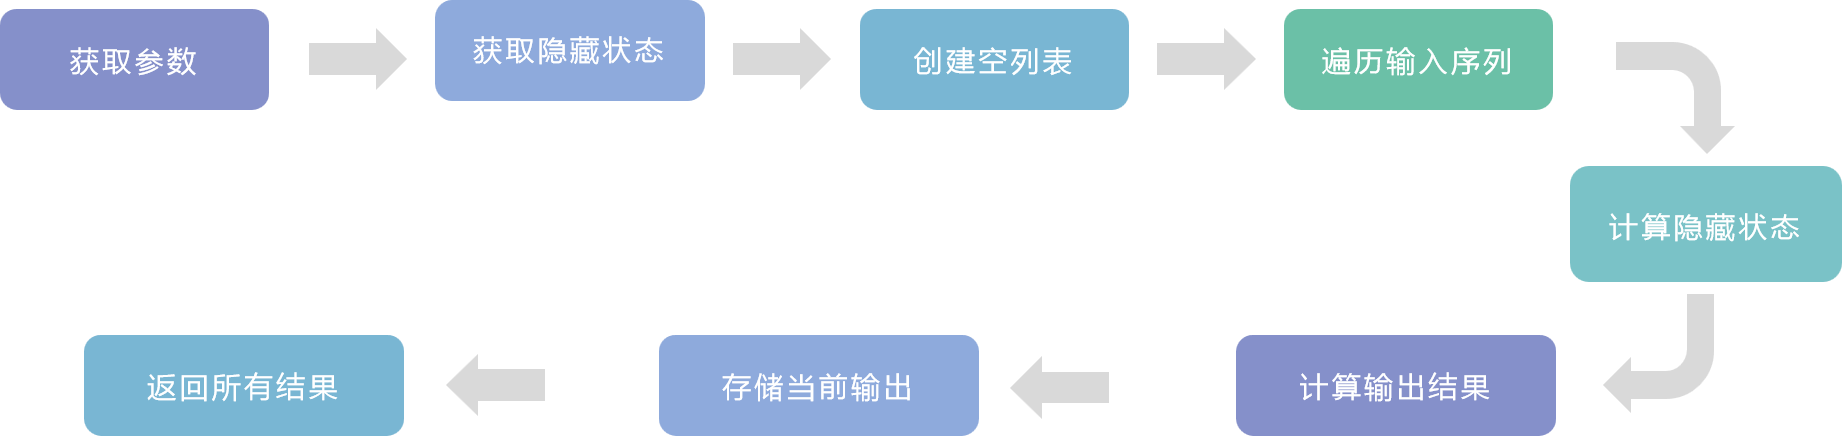

In [45]:
def rnn(inputs, state, params):
    W_xh, W_hh, b_h, W_hy, b_y = params
    H, = state
    outputs = []
    for X in inputs:
        H = torch.tanh(torch.matmul(X, W_xh) + torch.matmul(H, W_hh) + b_h)
        Y = torch.matmul(H, W_hy) + b_y
        outputs.append(Y)
    return outputs, (H,)

In [46]:
outputs, state_new = rnn(inputs, state, params)

In [47]:
rnn(inputs, state, params)

([tensor([[-1.2880e-03,  2.5624e-03, -9.4706e-04,  ...,  4.7195e-04,
           -1.1183e-03,  1.1603e-03],
          [ 2.4239e-03,  2.9637e-03,  6.3811e-04,  ...,  2.9954e-03,
            9.1603e-04,  5.5207e-05]], grad_fn=<AddBackward0>),
  tensor([[ 1.0417e-03, -1.5609e-03, -6.4786e-04,  ...,  4.8373e-03,
            1.0892e-03, -5.2024e-04],
          [-1.1299e-04,  3.8417e-03,  5.5037e-04,  ..., -4.2365e-04,
           -2.4829e-04,  6.5321e-05]], grad_fn=<AddBackward0>),
  tensor([[ 0.0008,  0.0005,  0.0003,  ...,  0.0011,  0.0022,  0.0004],
          [ 0.0029,  0.0010,  0.0005,  ..., -0.0004, -0.0014,  0.0010]],
         grad_fn=<AddBackward0>),
  tensor([[ 0.0005, -0.0032,  0.0029,  ...,  0.0003, -0.0003,  0.0017],
          [ 0.0002,  0.0026, -0.0006,  ...,  0.0015,  0.0006,  0.0015]],
         grad_fn=<AddBackward0>),
  tensor([[-0.0022, -0.0004, -0.0018,  ...,  0.0012,  0.0013,  0.0007],
          [ 0.0033,  0.0027, -0.0013,  ..., -0.0006, -0.0005,  0.0017]],
         grad_fn=

In [48]:
outputs

[tensor([[-1.2880e-03,  2.5624e-03, -9.4706e-04,  ...,  4.7195e-04,
          -1.1183e-03,  1.1603e-03],
         [ 2.4239e-03,  2.9637e-03,  6.3811e-04,  ...,  2.9954e-03,
           9.1603e-04,  5.5207e-05]], grad_fn=<AddBackward0>),
 tensor([[ 1.0417e-03, -1.5609e-03, -6.4786e-04,  ...,  4.8373e-03,
           1.0892e-03, -5.2024e-04],
         [-1.1299e-04,  3.8417e-03,  5.5037e-04,  ..., -4.2365e-04,
          -2.4829e-04,  6.5321e-05]], grad_fn=<AddBackward0>),
 tensor([[ 0.0008,  0.0005,  0.0003,  ...,  0.0011,  0.0022,  0.0004],
         [ 0.0029,  0.0010,  0.0005,  ..., -0.0004, -0.0014,  0.0010]],
        grad_fn=<AddBackward0>),
 tensor([[ 0.0005, -0.0032,  0.0029,  ...,  0.0003, -0.0003,  0.0017],
         [ 0.0002,  0.0026, -0.0006,  ...,  0.0015,  0.0006,  0.0015]],
        grad_fn=<AddBackward0>),
 tensor([[-0.0022, -0.0004, -0.0018,  ...,  0.0012,  0.0013,  0.0007],
         [ 0.0033,  0.0027, -0.0013,  ..., -0.0006, -0.0005,  0.0017]],
        grad_fn=<AddBackward0>)]

In [49]:
state_new

(tensor([[-4.0705e-03,  9.5529e-03, -1.6721e-03, -5.6006e-03,  6.7440e-03,
          -9.0403e-03, -1.8948e-03, -1.5989e-02,  7.1919e-03, -1.1945e-02,
           7.1888e-03,  1.0648e-02,  5.2949e-03, -4.6919e-03, -2.9729e-04,
          -1.7571e-02,  2.8250e-03, -5.9330e-03,  3.7691e-03,  1.7141e-02,
          -7.0459e-04, -1.6107e-02, -3.3164e-03,  1.3966e-02,  1.5440e-02,
           4.2858e-03, -1.8804e-02, -3.9981e-03,  2.7235e-03, -3.4318e-04,
          -1.1439e-02,  1.1241e-02,  4.2097e-04, -1.6408e-03, -9.0247e-03,
          -1.0296e-02, -2.1918e-03, -1.8999e-02,  1.9039e-03, -1.2051e-03,
          -1.5772e-03,  1.0833e-02, -3.8194e-04, -2.8242e-03, -3.3139e-03,
          -6.7792e-03,  4.4129e-03,  1.9079e-03, -1.3006e-02,  3.3381e-03,
          -3.2501e-03,  1.0768e-02,  4.2513e-03,  2.1130e-02,  5.1392e-03,
           1.1029e-03,  1.0747e-02, -8.0258e-03,  1.3377e-02,  4.6030e-03,
          -1.4666e-02,  1.8267e-02, -1.5598e-02,  1.1038e-02, -5.7054e-03,
          -2.1184e-04,  2

In [50]:
len(outputs)

5

In [51]:
outputs[0].shape

torch.Size([2, 1027])

In [52]:
state_new[0].shape

torch.Size([2, 256])

## 4.预测函数

In [53]:
def predict_rnn(prefix, num_chars, rnn, params, init_rnn_state,
                num_hiddens, vocab_size, device, idx_to_char, char_to_idx):
    state = init_rnn_state(1, num_hiddens, device)
    output = [char_to_idx[prefix[0]]]
    for t in range(num_chars + len(prefix) - 1):
        # 将上一时间步的输出作为当前时间步的输入
        X = to_onehot(torch.tensor([[output[-1]]], device=device), vocab_size)
        # 计算输出和更新隐藏状态
        (Y, state) = rnn(X, state, params)
        # 下一个时间步的输入是prefix里的字符或者当前的最佳预测字符
        if t < len(prefix) - 1:
            output.append(char_to_idx[prefix[t + 1]])
        else:
            output.append(int(Y[0].argmax(dim=1).item()))
    return ''.join([idx_to_char[i] for i in output])

In [54]:
predict_rnn('分开', 10, rnn, params, init_rnn_state, num_hiddens, vocab_size,
            device, idx_to_char, char_to_idx)

'分开传凉全喜果距甘 刀细'